# Hypothesis Testing on Subject Performance (Two-Feature)
-----
This notebook refers to the work in the "two-feature" manuscript (under review, Jan 2016). This is to test the null hypothesis on subject performance from Experiments 1, 2, 3 and 5, which is subject performance is not affected by change magnitude or conditions.

In [150]:
import fnmatch # file name matching
import os
from scipy.io import loadmat

from pandas import DataFrame, Series
import pandas as pd
import scipy as sp
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set('poster')
sns.set_style('whitegrid')

import statsmodels.api as sm

pd.options.mode.chained_assignment = None 

# colors
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)    

# 1. Load Data
## Experiment 1: Condition B vs. Condition C
### _N_=4

In [2]:
# set file path
pathname = 'two_feature_data/Exp1_4/'
subject_names = ['AAR','HS0','JSK','KL0','LLT','RRS','WK0','WR0']
exp_ids = [3,4,8,9] # 3: orientation (1F), 4: color (1F), 8 and 9: 2F
exp_code = 2

In [3]:
# Create a DataFrame from mat files by looping over subjects (subject_names)
def concat_matfiles(exp_code,exp_ids,pathname,subject_names,exp_num=0):
    file_names = os.listdir(pathname)
    
    df = DataFrame()
    for exp_id in exp_ids:
        temp2 = DataFrame()
        for subject_name in subject_names:

            # Create a tag to find files based on a subject name
            if exp_num == 0:
                subject_tag = subject_name + str(exp_code) + '_' + str(exp_id) + '_'
            else:
                subject_tag = subject_name + str(exp_code) + '_' + str(exp_code) + '_' + str(exp_id) + '_'
            subject_files = fnmatch.filter(file_names, subject_tag + '*.mat') # Filter the files

            # Loop over filtered files
            temp1 = DataFrame()
            for subject_file in subject_files:

                # Convert a MATLAB matrix to a DataFrame
                temp0 = DataFrame(loadmat(pathname+subject_file)['datamatrix'])
                temp1 = pd.concat([temp1,temp0],ignore_index=True) # Concatenate DataFrames

            # Create a column to assign subject names
            temp1['Name'] = DataFrame([subject_name]*len(temp1))
            temp2 = pd.concat([temp2,temp1],ignore_index=True) # Concatenate

            # Create a column to assign experiment index
            if exp_id == 1:
                feat_name = 'OriA'
            elif exp_id == 2:
                feat_name = 'ColA'
            elif exp_id == 3:
                feat_name = 'OriC'
            elif exp_id == 4:
                feat_name = 'ColC'
            elif exp_id == 5:
                feat_name = 'OriD2'
            elif exp_id == 6:
                feat_name = 'ColD2'
            elif exp_code == 6 and exp_id == 1:
                feat_name = 'OriD1'
            elif exp_code == 6 and exp_id == 2:
                feat_name = 'ColD1'
            else:
                feat_name = 'B'                
            temp2['Feature'] = DataFrame([feat_name]*len(temp2))
                
        # Concatenate all subject data to create a single DataFrame            
        df = pd.concat([df,temp2],ignore_index=True)
    return df

In [4]:
df = concat_matfiles(exp_code,exp_ids,pathname,subject_names)
df1 = df[['Name','Feature',1,2,8]]
df1.columns = ['Subject','Feature','Delta_Ori','Delta_Col','Correct']

In [5]:
def remap_colors(old_delta):
    if old_delta <= 180:
        new_delta = old_delta
    else:
        new_delta = 360 - old_delta
    new_delta = new_delta/2.0
    return new_delta

In [6]:
df1.Delta_Col = df1.Delta_Col.apply(lambda x: remap_colors(x))
df1.describe()

,Delta_Ori,Delta_Col,Correct
count,19200.000000,19200.000000,19200.000000
mean,0.144816,23.585052,0.655260
std,38.940657,29.221596,0.475296
min,-90.000000,0.000000,0.000000
25%,-9.777159,0.000000,0.000000
50%,0.000000,5.000000,1.000000
75%,11.281337,47.000000,1.000000
max,90.000000,90.000000,1.000000


### _N_=8

In [7]:
pathname = 'two_feature_data/Exp1_8/'
subject_names = ['AAR','HJK','HS0','JSK','JYP','KL0','MBC','WK0']
exp_ids = [3,4,8,9] # 3: orientation (1F), 4: color (1F), 8 and 9: 2F
exp_code = 4

In [8]:
df = concat_matfiles(exp_code,exp_ids,pathname,subject_names)
df1_8 = df[['Name','Feature',1,2,8]]
df1_8.columns = ['Subject','Feature','Delta_Ori','Delta_Col','Correct']

In [9]:
df1_8.Delta_Col = df1_8.Delta_Col.apply((lambda x: remap_colors(x)))
df1_8.describe()

,Delta_Ori,Delta_Col,Correct
count,19200.000000,19200.000000,19200.000000
mean,-0.359018,22.242943,0.351250
std,36.911073,28.901904,0.477373
min,-90.000000,0.000000,0.000000
25%,-0.752089,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.250696,44.000000,1.000000
max,90.000000,90.000000,1.000000


## Experiment 2: Condition C vs. Condition A

In [10]:
pathname = 'two_feature_data/Exp2/'
subject_names = ['BT0','HJK','HS0','ISK','LLT','MLA','WK0','YC0']
exp_ids = [1,2,3,4] # 3: orientation (1F), 4: color (1F), 8 and 9: 2F
exp_code = 1

In [11]:
df = concat_matfiles(exp_code,exp_ids,pathname,subject_names)
df2 = df[['Name','Feature',1,2,8]]
df2.columns = ['Subject','Feature','Delta_Ori','Delta_Col','Correct']

In [12]:
df2.Delta_Col = df2.Delta_Col.apply((lambda x: remap_colors(x)))
df2.describe()

,Delta_Ori,Delta_Col,Correct
count,19200.000000,19200.000000,19200.000000
mean,-0.212752,22.643047,0.666875
std,36.844724,29.179735,0.471343
min,-90.000000,0.000000,0.000000
25%,-1.253482,0.000000,0.000000
50%,0.000000,0.000000,1.000000
75%,0.000000,45.500000,1.000000
max,90.000000,90.000000,1.000000


## Experiment 3: Condition C vs. Condition D
- Condition C: one relevant feature ('two_feature_data/Exp1_4/')
- Condition D1: one relevant feature, one changing irrelevant feature ('two_feature_data/Exp3_one_change')
- Condition D2: one relevant feature, all changing irrelevant feature ('two_feature_data/Exp3_all_change')

In [13]:
pathnameD1 = 'one_change_lab/'
pathnameCD2 = 'two_feature_data/Exp3_all_change/' # this contains both Conditions A and D
subject_namesD1 = ['HJK','HS0','LLT','WK0','WZ0']
subject_namesCD2 = ['HJK','HS0','JSK','LLT','LN0','MBC','WK0','WZ0']

# there are only 3 subjects who did all experiments
common_subjects = set(subject_namesD1) & set(subject_namesCD2)
print common_subjects

set(['WK0', 'HS0', 'HJK', 'WZ0', 'LLT'])


In [14]:
exp_idsCD2 = [3,4,5,6] # 5: orientation + irrelevant color, 6: color + irrelevant orientation
exp_idsD1 = [1,2] # 1: orientation, 2: color
exp_codeCD2 = 3
exp_codeD1 = 6

In [15]:
dfCD2 = concat_matfiles(exp_codeCD2,exp_idsCD2,pathnameCD2,common_subjects)
dfD1 = concat_matfiles(exp_codeD1,exp_idsD1,pathnameD1,common_subjects,exp_num=1)
df = pd.concat([dfCD2,dfD1],ignore_index=True)
df3 = df[['Name','Feature',1,2,8]]
df3.columns = ['Subject','Feature','Delta_Ori','Delta_Col','Correct']

In [16]:
df3.Delta_Col = df3.Delta_Col.apply((lambda x: remap_colors(x)))
df3.describe()

,Delta_Ori,Delta_Col,Correct
count,18000.000000,18000.000000,18000.000000
mean,-0.576351,30.277167,0.687500
std,42.391533,30.165285,0.463525
min,-90.000000,0.000000,0.000000
25%,-23.816156,0.000000,0.000000
50%,0.000000,23.000000,1.000000
75%,21.309192,57.000000,1.000000
max,90.000000,90.000000,1.000000


# 2. Logistic regression: change magnitude vs. performance
## 2.1 Experiment 1
### Orientation: Condition B vs. Condition C

In [17]:
df1.Feature.unique()

array(['OriC', 'ColC', 'B'], dtype=object)

In [18]:
gb = df1.groupby('Feature')
df1_OriC = gb.get_group('OriC')
df1_ColC = gb.get_group('ColC')
df1_B = gb.get_group('B')

In [19]:
df1_OriB = df1_B[df1_B.Delta_Ori!=0]
df1_ColB = df1_B[df1_B.Delta_Col!=0]

In [20]:
df1_OriB['FeatInd'] = 1
df1_OriC['FeatInd'] = 0

In [21]:
df1_Ori = pd.concat([df1_OriB,df1_OriC],ignore_index=True)
df1_Ori = df1_Ori[['Subject','Delta_Ori','FeatInd','Correct']]
df1_Ori['AbsDeltaOri']=abs(df1_Ori.Delta_Ori)

In [22]:
df1_Ori.describe()

,Delta_Ori,FeatInd,Correct,AbsDeltaOri
count,10247.000000,10247.000000,10247.000000,10247.000000
mean,0.274477,0.531570,0.630916,44.805023
std,51.747574,0.499027,0.482580,25.888234
min,-90.000000,0.000000,0.000000,0.250696
25%,-43.871866,0.000000,0.000000,22.813370
50%,0.752089,1.000000,1.000000,43.871866
75%,43.871866,1.000000,1.000000,67.437326
max,90.000000,1.000000,1.000000,90.000000


In [71]:
def run_logistic_subject(df,columns):
    params = []
    pvalues = []    
    gb = df.groupby('Subject')
    for key in gb.groups.keys():
        df_temp = gb.get_group(key)
        df_temp['intercept'] = 1.0 # sm requires us to add a constant (intercept)
        X = df_temp[columns].values
        y = df_temp.Correct.values
        result = sm.Logit(y, X).fit()
        params.append(result.params)
        pvalues.append(result.pvalues)
    print np.round(params,3),
    print np.round(pvalues,3),
    return params, pvalues

In [24]:
params_E1_BC_Ori, pvalues_E1_BC_Ori = run_logistic_subject(df1_Ori,['AbsDeltaOri','FeatInd','intercept'])

Optimization terminated successfully.
         Current function value: 0.577747
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.464677
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.579357
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.655271
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.418628
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.503704
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.645422
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.632057
         Iterations 5


In [63]:
np.round(params_E1_BC_Ori,3)

array([[ 0.03 , -0.218, -0.447],
       [ 0.045, -0.204, -0.434],
       [ 0.032, -0.198, -0.617],
       [ 0.017, -0.116, -1.056],
       [ 0.062,  0.32 , -1.231],
       [ 0.045,  0.172, -1.073],
       [ 0.024, -0.224, -0.932],
       [ 0.026,  0.323, -1.02 ]])

In [64]:
np.round(pvalues_E1_BC_Ori,3)

array([[ 0.   ,  0.068,  0.001],
       [ 0.   ,  0.134,  0.002],
       [ 0.   ,  0.124,  0.   ],
       [ 0.   ,  0.33 ,  0.   ],
       [ 0.   ,  0.043,  0.   ],
       [ 0.   ,  0.226,  0.   ],
       [ 0.   ,  0.065,  0.   ],
       [ 0.   ,  0.008,  0.   ]])

### Color: Condition B vs. Condition C

In [25]:
df1_ColB['FeatInd'] = 1
df1_ColC['FeatInd'] = 0
df1_Col = pd.concat([df1_ColB,df1_ColC],ignore_index=True)
df1_Col = df1_Col[['Subject','Delta_Col','FeatInd','Correct']]

In [27]:
df1_Col.describe()

,Delta_Col,FeatInd,Correct
count,10145.000000,10145.000000,10145.000000
mean,44.636077,0.526861,0.682898
std,26.007802,0.499303,0.465370
min,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000
50%,44.500000,1.000000,1.000000
75%,67.000000,1.000000,1.000000
max,90.000000,1.000000,1.000000


In [50]:
params_E1_BC_Col, pvalues_E1_BC_Col = run_logistic_subject(df1_Col,['Delta_Col','FeatInd','intercept'])

Optimization terminated successfully.
         Current function value: 0.599791
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.472496
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.624829
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.667194
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.429589
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.454385
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.471283
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.598117
         Iterations 5


In [62]:
print np.round(params_E1_BC_Col,3),

[[ 0.024 -0.295 -0.196]
 [ 0.034 -0.352  0.154]
 [ 0.024 -0.118 -0.528]
 [ 0.016  0.162 -0.633]
 [ 0.051 -0.139 -0.509]
 [ 0.05   0.075 -0.871]
 [ 0.05  -0.483 -0.708]
 [ 0.03   0.124 -0.843]]


In [61]:
print np.round(pvalues_E1_BC_Col,3),

[[ 0.     0.012  0.129]
 [ 0.     0.01   0.283]
 [ 0.     0.347  0.   ]
 [ 0.     0.176  0.   ]
 [ 0.     0.367  0.001]
 [ 0.     0.618  0.   ]
 [ 0.     0.001  0.   ]
 [ 0.     0.334  0.   ]]


### *N*=8
**Orientation**

In [66]:
gb = df1_8.groupby('Feature')
df1_OriC = gb.get_group('OriC')
df1_ColC = gb.get_group('ColC')
df1_B = gb.get_group('B')

df1_OriB = df1_B[df1_B.Delta_Ori!=0]
df1_ColB = df1_B[df1_B.Delta_Col!=0]

df1_OriB['FeatInd'] = 1
df1_OriC['FeatInd'] = 0

df1_Ori = pd.concat([df1_OriB,df1_OriC],ignore_index=True)
df1_Ori = df1_Ori[['Subject','Delta_Ori','FeatInd','Correct']]
df1_Ori['AbsDeltaOri']=abs(df1_Ori.Delta_Ori)

In [68]:
df1_ColB['FeatInd'] = 1
df1_ColC['FeatInd'] = 0
df1_Col = pd.concat([df1_ColB,df1_ColC],ignore_index=True)
df1_Col = df1_Col[['Subject','Delta_Col','FeatInd','Correct']]

In [69]:
print df1_Ori.describe()
print df1_Col.describe()

         Delta_Ori      FeatInd      Correct  AbsDeltaOri
count  9660.000000  9660.000000  9660.000000  9660.000000
mean     -0.713576     0.503106     0.321429    45.080918
std      52.036682     0.500016     0.467049    25.996652
min     -90.000000     0.000000     0.000000     0.250696
25%     -45.877437     0.000000     0.000000    22.813370
50%      -0.250696     1.000000     0.000000    44.874652
75%      44.373259     1.000000     1.000000    67.938719
max      90.000000     1.000000     1.000000    90.000000
         Delta_Col      FeatInd      Correct
count  9526.000000  9526.000000  9526.000000
mean     44.831461     0.496116     0.381902
std      25.902210     0.500011     0.485878
min       0.000000     0.000000     0.000000
25%      22.500000     0.000000     0.000000
50%      44.500000     0.000000     0.000000
75%      67.000000     1.000000     1.000000
max      90.000000     1.000000     1.000000


In [72]:
params_E1_BC_8_Ori, pvalues_E1_BC_8_Ori = run_logistic_subject(df1_Ori,['AbsDeltaOri','FeatInd','intercept'])
params_E1_BC_8_Col, pvalues_E1_BC_8_Col = run_logistic_subject(df1_Col,['Delta_Col','FeatInd','intercept'])

Optimization terminated successfully.
         Current function value: 0.542045
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.567244
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.618086
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.571320
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.610415
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.609984
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.585275
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.544139
         Iterations 6
[[ 0.02  -0.207 -1.925]
 [ 0.022 -0.063 -1.947]
 [ 0.03   0.102 -1.783]
 [ 0.011 -0.207 -1.434]
 [ 0.031 -0.136 -1.709]
 [ 0.023 -0.5   -1.45 ]
 [ 0.021 -0.279 -1.68 ]
 [ 0.021 -0.418 

## 2.2 Experiment 2
### Condition A vs. Condition C

In [75]:
df2.Feature.unique()

array(['OriA', 'ColA', 'OriC', 'ColC'], dtype=object)

In [104]:
df2_Ori_ = df2.loc[df2['Feature'].isin(['OriA','OriC'])]
df2_Ori_['AbsDeltaOri']=abs(df2_Ori_.Delta_Ori)
df2_Col_ = df2.loc[df2['Feature'].isin(['ColA','ColC'])]

dummy_Ori = pd.get_dummies(df2_Ori_['Feature'])
dummy_Col = pd.get_dummies(df2_Col_['Feature'])
cols_to_keep_Ori = ['Correct','Subject','AbsDeltaOri']
cols_to_keep_Col = ['Correct','Subject','Delta_Col']

In [105]:
df2_Ori = df2_Ori_[cols_to_keep_Ori].join(dummy_Ori.ix[:, 'OriC'])
df2_Col = df2_Col_[cols_to_keep_Col].join(dummy_Col.ix[:, 'ColC'])

In [109]:
params_E2_AC_Ori, pvalues_E2_AC_Ori = run_logistic_subject(df2_Ori,['AbsDeltaOri','OriC','intercept'])
params_E2_AC_Col, pvalues_E2_AC_Col = run_logistic_subject(df2_Col,['Delta_Col','ColC','intercept'])

Optimization terminated successfully.
         Current function value: 0.566461
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.597476
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.480527
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.605721
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.616058
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.435297
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.448866
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.640860
         Iterations 5
[[ 0.033 -0.452 -0.497]
 [ 0.031  0.13  -0.915]
 [ 0.052  0.265 -1.278]
 [ 0.03   0.163 -0.993]
 [ 0.032  0.248 -1.342]
 [ 0.052 -0.013 -0.771]
 [ 0.055  0.07  -1.089]
 [ 0.024 -0.215 

## 2.3 Experiment 3

In [110]:
df3.Feature.unique()

array(['OriC', 'ColC', 'OriD2', 'ColD2', 'OriA', 'ColA'], dtype=object)

In [111]:
df3_Ori_ = df3.loc[df3['Feature'].isin(['OriA','OriC','OriD2'])]
df3_Ori_['AbsDeltaOri']=abs(df3_Ori_.Delta_Ori)
df3_Col_ = df3.loc[df3['Feature'].isin(['ColA','ColC','ColD2'])]

dummy_Ori = pd.get_dummies(df3_Ori_['Feature'])
dummy_Col = pd.get_dummies(df3_Col_['Feature'])
cols_to_keep_Ori = ['Correct','Subject','AbsDeltaOri']
cols_to_keep_Col = ['Correct','Subject','Delta_Col']

In [114]:
df3_Ori = df3_Ori_[cols_to_keep_Ori].join(dummy_Ori.ix[:, 'OriC':])
df3_Col = df3_Col_[cols_to_keep_Col].join(dummy_Col.ix[:, 'ColC':])

In [117]:
params_E3_ACD2_Ori, pvalues_E3_ACD2_Ori = run_logistic_subject(df3_Ori,['AbsDeltaOri','OriC','OriD2','intercept'])
params_E3_ACD2_Col, pvalues_E3_ACD2_Col = run_logistic_subject(df3_Col,['Delta_Col','ColC','ColD2','intercept'])

Optimization terminated successfully.
         Current function value: 0.403715
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.479716
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.599215
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.537884
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.599476
         Iterations 5
[[ 0.064 -0.155 -0.081 -1.052]
 [ 0.051  0.16   0.283 -1.306]
 [ 0.034  0.078  0.093 -1.162]
 [ 0.041 -0.455 -0.242 -0.78 ]
 [ 0.032  0.043  0.115 -1.043]] [[ 0.     0.335  0.613  0.   ]
 [ 0.     0.269  0.051  0.   ]
 [ 0.     0.538  0.465  0.   ]
 [ 0.     0.001  0.079  0.   ]
 [ 0.     0.737  0.366  0.   ]]Optimization terminated successfully.
         Current function value: 0.368496
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.5367

## 2.4 P value correction

In [163]:
pd.DataFrame(pvalues_E1_BC_Ori)[0].tolist()

[8.3045215631134341e-37,
 9.905669608419911e-48,
 1.0693287111351104e-32,
 1.2134223789835685e-13,
 2.1421235874337353e-47,
 5.5002371789094958e-44,
 3.7922340942882558e-24,
 2.4242307253959326e-25]

In [190]:
import statsmodels
from __future__ import division
def adjusted_p(pval_array,num_cols,method):
    # `bonferroni` : one-step correction
    # `holm` : step-down method using Bonferroni adjustments
    df_pval = pd.DataFrame(pval_array)
    for num_col in num_cols:
        results = statsmodels.sandbox.stats.multicomp.multipletests(df_pval[num_col].tolist(), method = method)
        print results[0], 100-np.round(sum(results[0]/len(results[0]))*100,2), '%'
        print np.round(results[1],3)

### Experiment 1

In [191]:
adjusted_p(pvalues_E1_BC_Ori,[0,1],'holm')
adjusted_p(pvalues_E1_BC_Col,[0,1],'holm')
adjusted_p(pvalues_E1_BC_8_Ori,[0,1],'holm')
adjusted_p(pvalues_E1_BC_8_Col,[0,1],'holm')

[ True  True  True  True  True  True  True  True] 0.0 %
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[False False False False False False False False] 100.0 %
[ 0.387  0.496  0.496  0.496  0.3    0.496  0.387  0.067]
[ True  True  True  True  True  True  True  True] 0.0 %
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[False False False False False False  True False] 87.5 %
[ 0.072  0.072  1.     0.879  1.     1.     0.009  1.   ]
[ True  True  True  True  True  True  True  True] 0.0 %
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[False False False False False  True False  True] 75.0 %
[ 0.579  0.832  0.832  0.579  0.832  0.001  0.184  0.013]
[ True  True  True  True  True  True  True  True] 0.0 %
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[False False False False False False  True False] 87.5 %
[ 1.     1.     1.     1.     1.     0.063  0.008  1.   ]


### Experiment 2

In [186]:
adjusted_p(pvalues_E2_AC_Ori,[0,1],'holm')
adjusted_p(pvalues_E2_AC_Col,[0,1],'holm')

[ True  True  True  True  True  True  True  True] 0.0 %
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ True False False False False False False False] 87.5 %
[ 0.005  0.924  0.419  0.784  0.332  1.     1.     0.419]
[ True  True  True  True  True  True  True  True] 0.0 %
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[ True False False False  True False False  True] 62.5 %
[ 0.033  1.     0.525  0.79   0.033  1.     1.     0.014]


### Experiment 3

In [187]:
adjusted_p(pvalues_E3_ACD2_Ori,[0,1,2],'holm')
adjusted_p(pvalues_E3_ACD2_Col,[0,1,2],'holm')

[ True  True  True  True  True] 0.0 %
[ 0.  0.  0.  0.  0.]
[False False False  True False] 80.0 %
[ 1.     1.     1.     0.004  1.   ]
[False False False False False] 100.0 %
[ 1.     0.256  1.     0.316  1.   ]
[ True  True  True  True  True] 0.0 %
[ 0.  0.  0.  0.  0.]
[False  True False False False] 80.0 %
[ 0.407  0.001  1.     1.     0.361]
[False False False False False] 100.0 %
[ 0.623  0.209  0.664  0.664  0.664]


# 3. Mturk summary
CSD vs. features for relevant and irrelvant features. Values are from the manuscript.

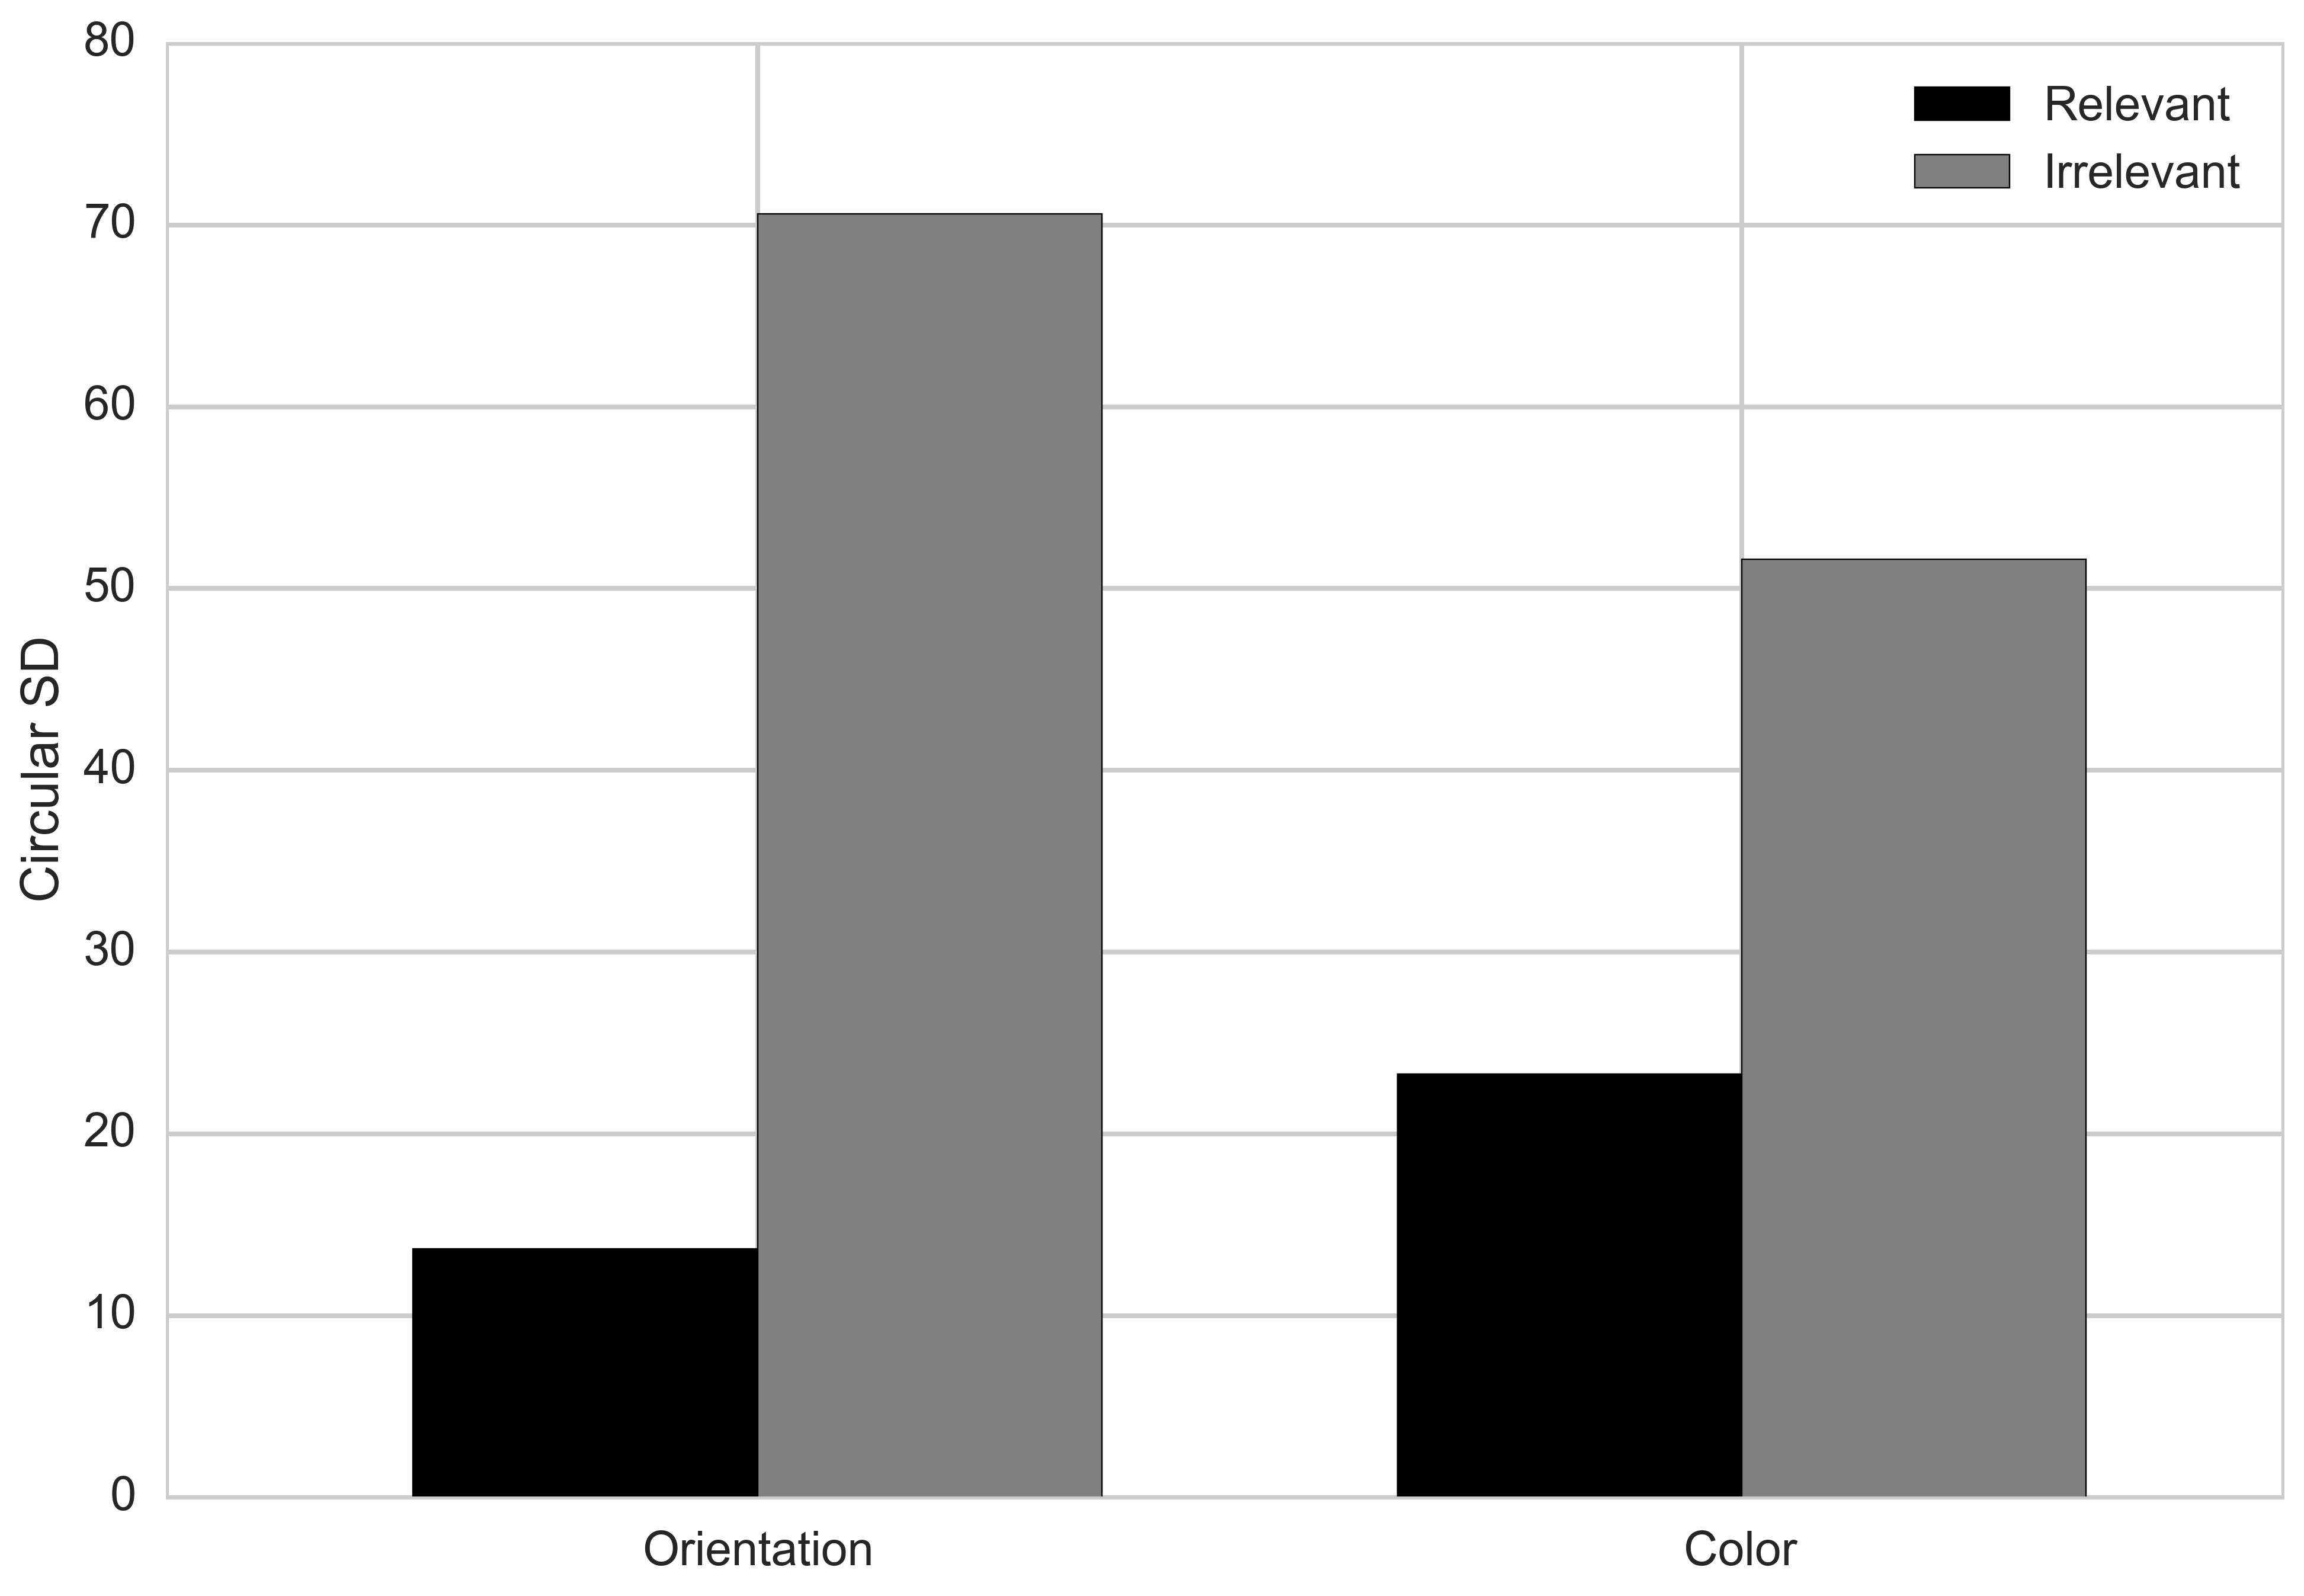

In [192]:
ind = np.arange(2)+0.5  # the x locations for the groups
width = 0.35       # the width of the bars

rel_csd = (13.7,23.3)
irr_csd = (70.6,51.6)

fig, ax = plt.subplots()
rects1 = ax.bar(ind, rel_csd, width, color='black')
rects2 = ax.bar(ind + width, irr_csd, width, color='gray')

# add some text for labels, title and axes ticks
ax.set_ylabel('Circular SD')
ax.set_xticks(ind + width)
ax.set_xticklabels(('Orientation', 'Color'))

ax.legend((rects1[0], rects2[0]), ('Relevant', 'Irrelevant'))
ax.set_xlim([0.25, 2.4])

plt.rc("savefig", dpi=360)
# plt.savefig('mturk_lab_CL.pdf')
plt.show()